<a href="https://colab.research.google.com/github/Ryan-S-S/Monitoria/blob/main/Algoritmo_Genetico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Algoritmos Genéticos**
> Inspirados em termos da biologia evolutiva, tais como hereditariedade, seleção natural, cruzamento e mutação, os Algoritmos Genéticos são uma técnica de Computação Evolucionária centrada na busca de soluções para problemas de otimização.

> O presente notebook colab, pretende introduzir a aplicação de Algorimos Genéticos. A presente codificação foi baseada na biblioteca deap e nos exemplos disponíveis em {1}.
---
{1} DEAP. Distributed Evolutionary Algorithms in Python. Disponível em: https://deap.readthedocs.io/en/master/. Acesso em: 1 mar 2021.

# **Seleção e Formulação do Problema**
> Simplificando um pouco, os Algortimos Genéticos buscam por soluções próximas do ótimo. Logo, são comumente empregados a problemas para os quais não existem algoritmos conhecidos que encontrem a solução ótima em tempo polinomial.

> Dessa forma, nada mais natural do que escolher um desses problemas para aplicar um algoritmo genético. Um exemplo clássico, bastante connhecido dos estudantes de cursos de computação, é o **Problema do Caixeiro Viajante**.

> O **Problema do Caixeiro Viajante**, ou *Travelling Salesman Problem*, reside no objetivo de encontrar a menor rota possível para visitar um conjunto de cidades, passando por cada uma delas uma única vez, e retornar à origem.
* O espaço de estados para esse problema pode ser representado por um grafo completamente conexo. Os vértices são as cidades e as arestas representam vias entre cidades, havendo uma distância (custo) associada.
* O trecho de código abaixo gera um grafo para o problema do caixeiro viajante.
  * O usuário pode escolher o número de cidades;
  * O grafo é gerado em uma matriz bidimensional, sendo as distâncias valores inteiros aleatórios no intervalo [10, 100].


# **População e Indivíduos**
> A **população** é o conjunto de indivíduos que estão sendo cogitados como solução e que serão usados para criar o novo conjunto de indivíduos para análise.

> O **indivíduo**, também chamado de cromossomo ou string, é uma possível solução para um dado problema. Cada **indivíduo** é um conjunto de parâmetros (genes), cuja representação depende do domínio do problema.
  * **Genótipo** é a sequência de genes. No caso do problema do caixeiro, cada gene é uma cidade (número do vértice).
    * Exemplo: [0, 2, 1, 4, 3] é um genótipo de indivíduo para o problema do caixeiro com 5 cidades.
  * **Fenótico** é o produto da interação de todos os genes.
    * Para o caixeiro seria a rota.

# **Avaliação da Aptidão**
> A Função de Aptidão ou Fitness mede o grau de aptidão de cada indivíduo da população.

> O grau de aptidão é a qualidade da solução (indivíduo) frente ao problema, ou seja, o quão próximo um indivíduo está da solução desejada ou quão boa é esta solução.

> Para o **Problema do Caixeiro Viajante** a aptidão está associada a menor rota. Assim, abaixo temos a função que mede o custo de uma rota (indivíduo).

# **Processamento do Algoritmo Genético**
> A estrutura básica de um algoritmo genético pode ser resumida pela Figura 1.

Figura 1. Estrutura Básica dos Algoritmos Genéticos

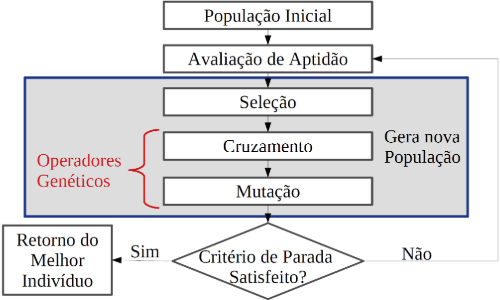

> **Gerações**
* A cada iteração do algoritmo, um novo conjunto de indivíduos é gerado a partir da população anterior.
* Cada novo conjunto é chamado de “Geração”.
* Através da criação de uma grande quantidade de gerações que é possível obter resultados dos Algoritmos Genéticos.

>**Avaliação de Aptidão**
* A função de aptidão é aplicada ao fenótipo do indivíduo.

>**Seleção**
* Selecionar os indivíduos sobre os quais serão aplicados os operadores genéticos.
* Escolhe preferencialmente, embora não exclusivamente, indivíduos com maior aptidão.
* Há diversas técnicas de seleção, entre elas há o método de seleção por Roleta e o método de seleção por Torneio.

>**Cruzamento**
* Também conhecida por Crossover ou Recombinação.
* Recombinação de características dos pais (Figura 2).
  * Permite que as próximas gerações herdem essas características.
* Escolhe dois indivíduos e troca trechos dos cromossomos entre eles.

Figura 2. Crossover de 1 ponto

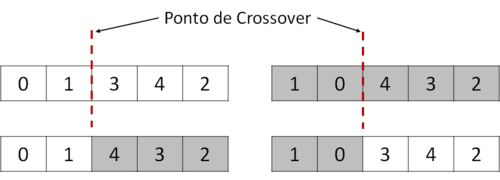


>**Mutação**
* Introdução e manutenção da diversidade genética.
* Altera aleatoriamente um ou mais genes no cromossomo (Figura 3).


Figura 3. Mutação de um gene

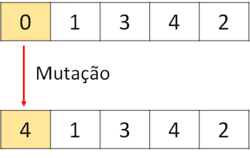

 ## Importando pacotes e módulos
 ---

In [ ]:
# Instalação de DEAP
!pip install deap

from deap import algorithms
from deap import base
from deap import creator
from deap import tools

import random
import numpy

## Geração do grafo para o problema do caixeiro
---

In [2]:
# função graphTSP(numCities, minDist, maxDist)
# parâmetros:
#   numCities: número de cities
#   minDist: menor valor de distância
#   maxDist: maior valor de distância
# retorno:
#   cities: grafo de cidades (Matriz numCities X numCities). As distância
#   entre duas cidades são determinadas aleatoriamente entre minDist e maxDist

def graphTSP(numCities, minDist, maxDist):
  cities = numpy.zeros((numCities, numCities), dtype = int)
  for i in range(numCities):
    for j in range(numCities):
      if (j>i):
        cities[i, j] = random.randint(minDist, maxDist)
      elif (j<i):
        cities[i, j] = cities[j, i]
  return cities

numCities = 5     #  Número de cidade inicial

while(True):
  numCities = int(input('Digite o número de cidades: '))
  if (numCities > 4):
    break
  else:
    print('O número de cidades deve ser maior que 4!')

cities = graphTSP(numCities, 10, 100)
print('Grafo:\n', cities)

Grafo:
 [[ 0 61 86 58 91 34 14 76]
 [61  0 79 92 33 95 19 45]
 [86 79  0 20 44 16 51 46]
 [58 92 20  0 94 86 35 51]
 [91 33 44 94  0 82 25 53]
 [34 95 16 86 82  0 90 43]
 [14 19 51 35 25 90  0 84]
 [76 45 46 51 53 43 84  0]]


## Definição da Geração dos Indivíduos
---

In [3]:
creator.create("FitnessMin", base.Fitness, weights=(-1.0,)) # minimizar = peso negativo
creator.create("Individual", list, fitness=creator.FitnessMin)

toolbox = base.Toolbox()

# gerador de parâmetros
toolbox.register("attr_int", random.randint, 0, numCities-1)

# define como os indivíduos/população é gerada
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_int, numCities)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

# Função para a avaliação da aptidão
---

In [ ]:
# Função evalRoute(individual)
# parâmetros:
#   individual: uma rota
# retorno:
#   (cost, ): tupla contendo apenas o custo da rota (cost).
#             * precisa ser uma tupla devido a exigências do pacote DEAP

def evalRoute(individual):
  cost = 0
  for i in range(1, len(individual)):
    if (individual.count(individual[i])>1):
      cost = cost + 1000000 # penalidade por repetir cidade
    cost = cost + cities[individual[i-1], individual[i]]
  cost = cost + cities[individual[i],individual[0]]
  return (cost,)

# Processamento do Algoritmo Genético
---

In [5]:
# Definindo avaliação de aptidão, seleção, cruzamento e mutação
toolbox.register("evaluate", evalRoute)
toolbox.register("select", tools.selTournament, tournsize=3) # seleção por torneio
toolbox.register("mate", tools.cxOnePoint) # um ponto de cruzamento
toolbox.register("mutate", tools.mutUniformInt, low=0, up=numCities-1, indpb=0.05)

def main():
  print('Execução do algoritmo genético:')

  # random.seed(64)
  NGEN = 100     # número de gerações
  MU = 50        # tamanho da população
  LAMBDA = 100   # número de filhos gerados
  CXPB = 0.7     # probabilidade de cruzamento
  MUTPB = 0.3    # probabilidade de mutação

  pop = toolbox.population(n=MU)
  hof = tools.ParetoFront()
  stats = tools.Statistics(lambda ind: ind.fitness.values)
  stats.register("avg", numpy.mean, axis=0)
  stats.register("std", numpy.std, axis=0)
  stats.register("min", numpy.min, axis=0)
  stats.register("max", numpy.max, axis=0)

  algorithms.eaMuPlusLambda(pop, toolbox, MU, LAMBDA, CXPB, MUTPB, NGEN, stats,
                            halloffame=hof)

  print('\nRota:', hof[0],'\nCusto:', evalRoute(hof[0])[0])
  return pop, stats, hof

if __name__ == "__main__":
    main()

Execução do algoritmo genético:
gen	nevals	avg         	std               	min   	max       
0  	50    	[4060384.62]	[1419993.06149779]	[303.]	[7000584.]
1  	100   	[3140380.]  	[1058472.86696227]	[303.]	[5000397.]
2  	100   	[2740381.86]	[1054681.13498407]	[1000324.]	[5000391.]
3  	100   	[1920404.22]	[820712.69235123] 	[611.]    	[4000429.]
4  	100   	[1360397.68]	[714415.67424758] 	[469.]    	[3000346.]
5  	100   	[1020390.86]	[677912.12626644] 	[469.]    	[3000483.]
6  	100   	[840364.4]  	[643696.92616986] 	[469.]    	[3000435.]
7  	100   	[500392.46] 	[499923.46022747] 	[469.]    	[1000406.]
8  	100   	[220439.32] 	[539944.98178498] 	[469.]    	[3000305.]
9  	100   	[20466.78]  	[139984.46]       	[469.]    	[1000358.]
10 	100   	[469.]      	[0.]              	[469.]    	[469.]    
11 	100   	[469.]      	[0.]              	[469.]    	[469.]    
12 	100   	[469.]      	[0.]              	[469.]    	[469.]    
13 	100   	[469.]      	[0.]              	[469.]    	[469.]    
14 	1